# Model the data about concrete compressive strength using the deep learning Keras library
data link: https://cocl.us/concrete_data. 

In [71]:
import pandas as pd
import numpy as np
import keras
from keras.models import  Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import statistics

# A. Build a baseline model 
- One hidden layer of 10 nodes, and a ReLU activation function

- Use the adam optimizer and the mean squared error as the loss function.

In [21]:
df=pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [22]:
#checking the shape
df.shape

(1030, 9)

In [23]:
#to check if there are any null values present in the df
df.isnull().sum().sum()

0

In [24]:
# Select the dependent and independent data columns
df_cols=df.columns
X=df[df_cols[df_cols!='Strength']]
Y=df['Strength']

In [25]:
n_cols = X.shape[1] # number of predictors

Randomly split the data into a training and test sets by holding 30% of the data for testing. You can use the train_test_split helper function from Scikit-learn.

In [26]:
def splitter_train_test(X, Y):
    X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.30, random_state=340)
    return X_train, X_test, Y_train, Y_test

In [27]:
X_train, X_test, Y_train, Y_test=splitter_train_test(X, Y)

Creating the model function

- One hidden layer of 10 nodes, and a ReLU activation function

- Use the adam optimizer and the mean squared error as the loss function.

In [28]:
def regr_model():
    model=Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model    

#### Train and Test the Network
build model using the function created above

In [29]:
model1= regr_model()

 Train the model on the training data using 50 epochs.

In [30]:
mse1=[]
for epoch in range(50):
    model1.fit(X_train, Y_train, epochs=50, verbose=2)
    scores = model1.evaluate(X_test, Y_test, verbose=0)
    print(scores)
    mse1.append(scores)

Epoch 1/50
 - 1s - loss: 488892.5423
Epoch 2/50
 - 0s - loss: 337706.6547
Epoch 3/50
 - 0s - loss: 224547.2286
Epoch 4/50
 - 0s - loss: 142091.1203
Epoch 5/50
 - 0s - loss: 84110.3117
Epoch 6/50
 - 0s - loss: 46287.2125
Epoch 7/50
 - 0s - loss: 23558.3435
Epoch 8/50
 - 0s - loss: 11187.8170
Epoch 9/50
 - 0s - loss: 5303.1928
Epoch 10/50
 - 0s - loss: 2780.7510
Epoch 11/50
 - 0s - loss: 1866.0228
Epoch 12/50
 - 0s - loss: 1530.0837
Epoch 13/50
 - 0s - loss: 1414.7717
Epoch 14/50
 - 0s - loss: 1354.0887
Epoch 15/50
 - 0s - loss: 1305.2756
Epoch 16/50
 - 0s - loss: 1261.6719
Epoch 17/50
 - 0s - loss: 1218.4279
Epoch 18/50
 - 0s - loss: 1173.8300
Epoch 19/50
 - 0s - loss: 1131.5265
Epoch 20/50
 - 0s - loss: 1089.1646
Epoch 21/50
 - 0s - loss: 1047.8762
Epoch 22/50
 - 0s - loss: 1007.0141
Epoch 23/50
 - 0s - loss: 966.6609
Epoch 24/50
 - 0s - loss: 927.7078
Epoch 25/50
 - 0s - loss: 888.8937
Epoch 26/50
 - 0s - loss: 851.0656
Epoch 27/50
 - 0s - loss: 814.1260
Epoch 28/50
 - 0s - loss: 779.

##### Error Variance in 50 epoches

Text(0.5, 1.0, 'Error Variance in 50 epoches for Model A')

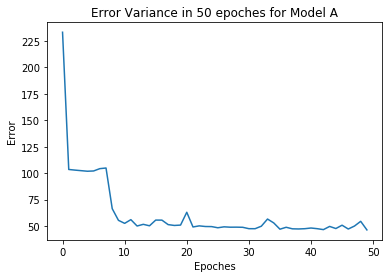

In [73]:
plt.plot(mse1)
plt.xlabel('Epoches')
plt.ylabel('Error')
plt.title('Error Variance in 50 epoches for Model A')

Reporting the mean and the standard deviation of the mean squared errors.

In [63]:
print('Mean Error of the Model A is =', statistics.mean(mse1))
print('Standard Deviation of Mean Error of the Model A is =', statistics.stdev(mse1))

Mean Error of the Model A is = 61.64703502864899
Standard Deviation of Mean Error of the Model A is = 31.064515195601135


# B. Normalize the data

to find mean of the mean squared errors compare to that from Step A

In [31]:
#normalizing the data
X_norm = (X - X.mean()) / X.std()
X_norm.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,0.862735,-1.217079,-0.279597
1,2.476712,-0.856472,-0.846733,-0.916319,-0.620147,1.055651,-1.217079,-0.279597
2,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,3.551340
3,0.491187,0.795140,-0.846733,2.174405,-1.038638,-0.526262,-2.239829,5.055221
4,-0.790075,0.678079,-0.846733,0.488555,-1.038638,0.070492,0.647569,4.976069


In [32]:
#splitting the data again using normalized data
X_train, X_test, Y_train, Y_test=splitter_train_test(X_norm, Y)

In [34]:
model2= regr_model()
mse2=[]
for epoch in range(50):
    model2.fit(X_train, Y_train, epochs=50, verbose=2)
    scores = model2.evaluate(X_test, Y_test, verbose=0)
    print('epoch number :', epoch, scores)
    mse2.append(scores)

Epoch 1/50
 - 1s - loss: 1592.1827
Epoch 2/50
 - 0s - loss: 1573.7539
Epoch 3/50
 - 0s - loss: 1555.3354
Epoch 4/50
 - 0s - loss: 1536.4313
Epoch 5/50
 - 0s - loss: 1517.3630
Epoch 6/50
 - 0s - loss: 1497.2806
Epoch 7/50
 - 0s - loss: 1476.2411
Epoch 8/50
 - 0s - loss: 1454.5897
Epoch 9/50
 - 0s - loss: 1432.0166
Epoch 10/50
 - 0s - loss: 1407.7641
Epoch 11/50
 - 0s - loss: 1382.9298
Epoch 12/50
 - 0s - loss: 1357.0591
Epoch 13/50
 - 0s - loss: 1329.9253
Epoch 14/50
 - 0s - loss: 1302.1491
Epoch 15/50
 - 0s - loss: 1273.4727
Epoch 16/50
 - 0s - loss: 1244.5673
Epoch 17/50
 - 0s - loss: 1214.3701
Epoch 18/50
 - 0s - loss: 1184.0595
Epoch 19/50
 - 0s - loss: 1153.1094
Epoch 20/50
 - 0s - loss: 1121.7850
Epoch 21/50
 - 0s - loss: 1090.7619
Epoch 22/50
 - 0s - loss: 1059.1652
Epoch 23/50
 - 0s - loss: 1027.7146
Epoch 24/50
 - 0s - loss: 996.3412
Epoch 25/50
 - 0s - loss: 965.8894
Epoch 26/50
 - 0s - loss: 934.0241
Epoch 27/50
 - 0s - loss: 903.6665
Epoch 28/50
 - 0s - loss: 873.4288
Epoch 

Text(0.5, 1.0, 'Error Variance in 50 epoches for Model B')

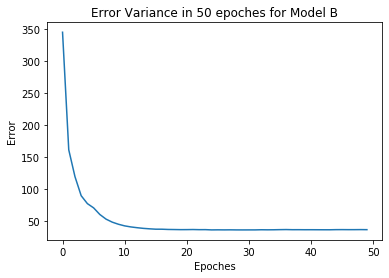

In [74]:
plt.plot(mse2)
plt.xlabel('Epoches')
plt.ylabel('Error')
plt.title('Error Variance in 50 epoches for Model B')

In [64]:
print('Mean Error of the Model B is =', statistics.mean(mse2))
print('Standard Deviation of Mean Error of the Model B is =', statistics.stdev(mse2))

Mean Error of the Model B is = 51.62546580169579
Standard Deviation of Mean Error of the Model B is = 48.06196958248764


Text(0.5, 1.0, 'Mean of the Mean Squared Errors from Step A and B compared')

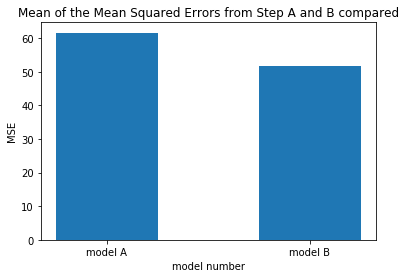

In [61]:
avgMeans=[sum(mse1)/len(mse1), sum(mse2)/len(mse2)]
fig = plt.figure()
s = fig.add_subplot(111)
s.bar(['model A', 'model B'], avgMeans, width=0.5)
plt.xlabel('model number')
plt.ylabel('MSE')
plt.title('Mean of the Mean Squared Errors from Step A and B compared')

In [60]:
print('Mean Errors are: \n 1. Mean Error of Model from Step A: ', avgMeans[0], '\n 2. Mean Error of Model from Step B: ', avgMeans[1])

Mean Errors are: 
 1. Mean Error of Model from Step A:  61.647035028649 
 2. Mean Error of Model from Step B:  51.62546580169578


# C. Increate the number of epochs
###### Using 100 epochs this time for training.

In [52]:
model3= regr_model()
mse3=[]
for epoch in range(50):
    model3.fit(X_train, Y_train, epochs=100, verbose=0)
    scores = model3.evaluate(X_test, Y_test, verbose=0)
    print('epoch number :', epoch, scores)
    mse3.append(scores)

epoch number : 0 168.7071304568195
epoch number : 1 88.7598200924574
epoch number : 2 60.51216520537836
epoch number : 3 51.122382673245035
epoch number : 4 47.42186618545681
epoch number : 5 45.324571948992784
epoch number : 6 43.84780720831121
epoch number : 7 42.80090887569687
epoch number : 8 41.06793320294723
epoch number : 9 39.931905764977905
epoch number : 10 39.32389847591857
epoch number : 11 38.99415736522489
epoch number : 12 38.56035001686862
epoch number : 13 38.08131937070186
epoch number : 14 37.70980144858746
epoch number : 15 37.64302520998859
epoch number : 16 37.500176809366465
epoch number : 17 37.270419037457806
epoch number : 18 37.274663153589735
epoch number : 19 37.2913274178613
epoch number : 20 37.29493396104732
epoch number : 21 37.325618040214465
epoch number : 22 37.12071750233474
epoch number : 23 37.02874570679896
epoch number : 24 36.89975723711032
epoch number : 25 36.85156082103939
epoch number : 26 36.67451006694905
epoch number : 27 36.728792085616

Text(0.5, 1.0, 'Error Variance in 50 epoches for Model C')

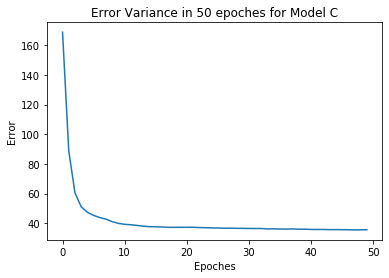

In [75]:
plt.plot(mse3)
plt.xlabel('Epoches')
plt.ylabel('Error')
plt.title('Error Variance in 50 epoches for Model C')

Text(0.5, 1.0, 'Mean of the Mean Squared Errors from Step A, B and C compared')

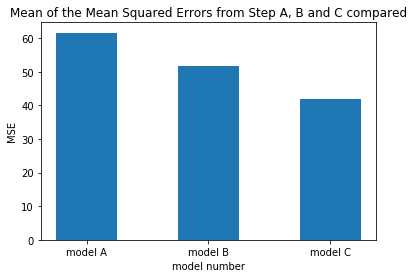

In [62]:
avgMeans.append(sum(mse3)/len(mse3))
fig = plt.figure()
s = fig.add_subplot(111)
s.bar(['model A', 'model B', 'model C'], avgMeans, width=0.5)
plt.xlabel('model number')
plt.ylabel('MSE')
plt.title('Mean of the Mean Squared Errors from Step A, B and C compared')

In [65]:
print('Mean Error of the Model C is =', statistics.mean(mse3))
print('Standard Deviation of Mean Error of the Model C is =', statistics.stdev(mse3))

Mean Error of the Model C is = 41.956069522351505
Standard Deviation of Mean Error of the Model C is = 20.13805408555207


How does the mean of the mean squared errors compare to that from Step B?

In [59]:
print('Mean Errors are: \n 1. Mean Error of Model from Step B: ', avgMeans[1], '\n 2. Mean Error of Model from Step C: ', avgMeans[2])

Mean Errors are: 
 1. Mean Error of Model from Step B:  51.62546580169578 
 2. Mean Error of Model from Step C:  41.9560695223515


# D. Increase the number of hidden layers 

Repeating part B but use a neural network with the following instead:

- Three hidden layers, each of 10 nodes and ReLU activation function.

In [66]:
def regr_model_modified():
    model=Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model  

In [67]:
model4=regr_model_modified()
mse4=[]
for epoch in range(50):
    model4.fit(X_train, Y_train, epochs=50, verbose=0)
    scores = model4.evaluate(X_test, Y_test, verbose=0)
    print('epoch number :', epoch, scores)
    mse4.append(scores)

epoch number : 0 137.66608752401902
epoch number : 1 87.93377243585185
epoch number : 2 53.91460487834844
epoch number : 3 44.75136801957313
epoch number : 4 42.382398969532986
epoch number : 5 40.615318273649244
epoch number : 6 38.72202509660937
epoch number : 7 39.1293602483558
epoch number : 8 40.0728513847277
epoch number : 9 39.68192497426252
epoch number : 10 39.83781467672305
epoch number : 11 39.29867169772151
epoch number : 12 39.582197430064376
epoch number : 13 39.2940208040009
epoch number : 14 39.071169757534385
epoch number : 15 40.900973125568875
epoch number : 16 38.35398441302352
epoch number : 17 38.35518798087407
epoch number : 18 38.42645253795636
epoch number : 19 38.13524279548127
epoch number : 20 37.830037928707775
epoch number : 21 37.43360435461149
epoch number : 22 37.24864536273055
epoch number : 23 36.4108948445243
epoch number : 24 36.64101698792096
epoch number : 25 36.131103367481415
epoch number : 26 37.41905546959936
epoch number : 27 37.2444621212659

Text(0.5, 1.0, 'Error Variance in 50 epoches for Model D')

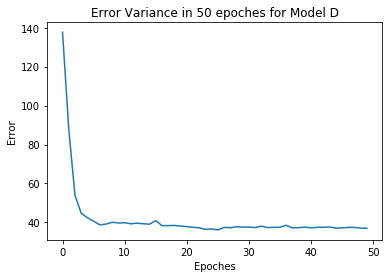

In [77]:
plt.plot(mse4)
plt.xlabel('Epoches')
plt.ylabel('Error')
plt.title('Error Variance in 50 epoches for Model D')

Text(0.5, 1.0, 'Mean of the Mean Squared Errors from Step A, B, C, and D compared')

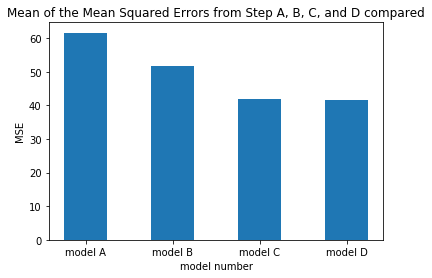

In [68]:
avgMeans.append(sum(mse4)/len(mse4))
fig = plt.figure()
s = fig.add_subplot(111)
s.bar(['model A', 'model B', 'model C', 'model D'], avgMeans, width=0.5)
plt.xlabel('model number')
plt.ylabel('MSE')
plt.title('Mean of the Mean Squared Errors from Step A, B, C, and D compared')

In [69]:
print('Mean Error of the Model D is =', statistics.mean(mse4))
print('Standard Deviation of Mean Error of the Model D is =', statistics.stdev(mse4))

Mean Error of the Model D is = 41.52802964540747
Standard Deviation of Mean Error of the Model D is = 15.763719208486265


How does the mean of the mean squared errors compare to that from Step B?

In [70]:
print('Mean Errors are: \n 1.Mean Error of Model from Step B: ', avgMeans[1], '\n 2. Mean Error of Model from Step D: ', avgMeans[3])

Mean Errors are: 
 1.Mean Error of Model from Step B:  51.62546580169578 
 2. Mean Error of Model from Step D:  41.52802964540748
